<a href="https://colab.research.google.com/github/sisomimoctrl/study-tensorflow/blob/main/reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

print(tf.__version__)

2.8.2


In [2]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [3]:
train_data.shape, type(train_data), type(train_data[0])

((8982,), numpy.ndarray, list)

In [4]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [6]:
X_train.shape, X_test.shape

((8982, 10000), (2246, 10000))

In [7]:
train_labels.shape, type(train_labels), type(train_labels[0])

((8982,), numpy.ndarray, numpy.int64)

In [8]:
print(train_labels)

[ 3  4  3 ... 25  3 25]


In [9]:
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [10]:
one_hot_train_labels.shape, one_hot_test_labels.shape

((8982, 46), (2246, 46))

In [11]:
print(one_hot_train_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640064    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 46)                2990      
                                                                 
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
X_val = X_train[:1000]
partial_X_train = X_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [15]:
history = model.fit(partial_X_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 39ms/step - loss: 2.6561 - accuracy: 0.5040 - val_loss: 1.7867 - val_accuracy: 0.6270
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 1.4552 - accuracy: 0.6998 - val_loss: 1.3295 - val_accuracy: 0.7080
Epoch 3/20
16/16 [==============================] - 0s 20ms/step - loss: 1.0693 - accuracy: 0.7769 - val_loss: 1.1548 - val_accuracy: 0.7530
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.8379 - accuracy: 0.8285 - val_loss: 1.0489 - val_accuracy: 0.7800
Epoch 5/20
16/16 [==============================] - 0s 20ms/step - loss: 0.6703 - accuracy: 0.8637 - val_loss: 0.9803 - val_accuracy: 0.7890
Epoch 6/20
16/16 [==============================] - 0s 22ms/step - loss: 0.5348 - accuracy: 0.8923 - val_loss: 0.9203 - val_accuracy: 0.8110
Epoch 7/20
16/16 [==============================] - 0s 24ms/step - loss: 0.4297 - accuracy: 0.9118 - val_loss: 0.8903 - val_accuracy: 0.8100
Epoch 8/20
16

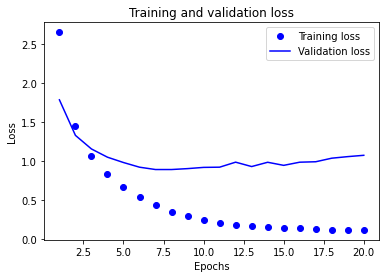

In [16]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

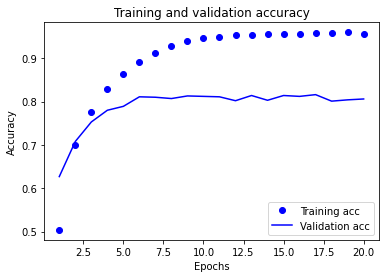

In [17]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [18]:
scores = model.evaluate(X_test, one_hot_test_labels)
print(f'{model.metrics_names[1]} : {scores[1]*100:.2f} %')

71/71 [==============================] - 0s 3ms/step - loss: 1.2704 - accuracy: 0.7760
accuracy : 77.60 %
